#LEGO
For our final project, we scraped data from the LEGO website. This data includes: short link, set name, price, recommended age, number of LEGO pieces, and overall rating. We then put this data into a dataframe and saved it as a CSV using os. Using pyautogui, we collected photos of the products and saved them to a folder. With this information, we created posters using Pillow and ReportLab to "advertise" the best holiday gifts to give. Finally, we scheduled automated emails to be sent out to a potential buyer email list.

## LEGO dataframe

In [ ]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
url = "https://www.lego.com/en-us/categories/all-sets?page=1&filters.i0.key=variants.attributes.availabilityStatus.zxx-US&filters.i0.values.i0=%22E_AVAILABLE%22&inStockOnly=1&offset=1"

In [ ]:
response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')

In [ ]:
response

<Response [200]>

In [ ]:
soup = BeautifulSoup(response.text,'html.parser')

In [ ]:
# Extract all 'a' tags containing product names
product_links = soup.find_all('a', class_='ds-body-md-medium ProductLeaf_title__1UhfJ')

# Extract the text from the nested 'span' tag
product_names = [link.find('span', class_='markup').text.strip() for link in product_links]

print(product_names)

['The Botanical Garden', "Santa's Post Office", 'X-Men: The X-Mansion', 'Supply Llama', 'Durrr Burger', 'Christmas Table Decoration', "Santa's Delivery Truck", 'The Insect Collection', 'Bumblebee', 'Captain America & Red Hulk Figures', 'Jaws', 'Dungeons & Dragons®', 'The Force of Creativity', 'Concorde', 'Stitch', 'EVE & WALL•E']


In [ ]:
def get_product_links(soup):
    product_links = soup.find_all('a', class_='ds-body-md-medium ProductLeaf_title__1UhfJ')
    links = []
    for item in product_links:
        # Get the href attribute instead of the text
        link = item.get('href')
        if link:  # Ensure the link exists
            links.append(link)
    return links

In [ ]:
get_product_links(soup)

['/en-us/product/the-botanical-garden-21353',
 '/en-us/product/santa-s-post-office-10339',
 '/en-us/product/x-men-the-x-mansion-76294',
 '/en-us/product/fortnite-77071-77071',
 '/en-us/product/durrr-burger-77070',
 '/en-us/product/christmas-table-decoration-40743',
 '/en-us/product/santas-delivery-truck-40746',
 '/en-us/product/the-insect-collection-21342',
 '/en-us/product/bumblebee-10338',
 '/en-us/product/captain-america--red-hulk-figures-40668',
 '/en-us/product/jaws-21350',
 '/en-us/product/tbd-minifigures-ip-3-2024-71047',
 '/en-us/product/the-force-of-creativity-5008878',
 '/en-us/product/concorde-10318',
 '/en-us/product/stitch-40674',
 '/en-us/product/eve--walle-40619']

In [ ]:
def get_product_name(soup):
  product_names = [link.find('span', class_='markup').text.strip() for link in product_links]
  names = []
  for item in product_names:
    names.append(item)
  return names

In [ ]:
get_product_name(soup)

['The Botanical Garden',
 "Santa's Post Office",
 'X-Men: The X-Mansion',
 'Supply Llama',
 'Durrr Burger',
 'Christmas Table Decoration',
 "Santa's Delivery Truck",
 'The Insect Collection',
 'Bumblebee',
 'Captain America & Red Hulk Figures',
 'Jaws',
 'Dungeons & Dragons®',
 'The Force of Creativity',
 'Concorde',
 'Stitch',
 'EVE & WALL•E']

In [ ]:
len(get_product_name(soup))

16

In [ ]:
set_price = soup.find_all('div', class_='ProductLeaf_priceRow__RUx3P')
set_price

[<div aria-label="$329.99" class="ProductLeaf_priceRow__RUx3P" data-test="product-leaf-price-row"><span class="ds-label-md-bold" data-test="product-leaf-price">$329.99</span></div>,
 <div aria-label="$99.99" class="ProductLeaf_priceRow__RUx3P" data-test="product-leaf-price-row"><span class="ds-label-md-bold" data-test="product-leaf-price">$99.99</span></div>,
 <div aria-label="$329.99" class="ProductLeaf_priceRow__RUx3P" data-test="product-leaf-price-row"><span class="ds-label-md-bold" data-test="product-leaf-price">$329.99</span></div>,
 <div aria-label="$39.99" class="ProductLeaf_priceRow__RUx3P" data-test="product-leaf-price-row"><span class="ds-label-md-bold" data-test="product-leaf-price">$39.99</span></div>,
 <div aria-label="$14.99" class="ProductLeaf_priceRow__RUx3P" data-test="product-leaf-price-row"><span class="ds-label-md-bold" data-test="product-leaf-price">$14.99</span></div>,
 <div aria-label="$27.99" class="ProductLeaf_priceRow__RUx3P" data-test="product-leaf-price-row"

In [ ]:
def get_set_price(soup):
    set_price = soup.find_all('div', class_='ProductLeaf_priceRow__RUx3P')
    price = []
    seen_discounts = set()

    for item in set_price:
        if '$' in item.text:
            text = item.text.strip()
            # Check if this is a "% OFF" price
            if "% OFF" in text:
                # Add to the list only if not already seen
                if text not in seen_discounts:
                    price.append(text)
                    seen_discounts.add(text)
            else:
                # Add non-discount prices directly
                price.append(text)

    return price

In [ ]:
get_set_price(soup)

['$329.99',
 '$99.99',
 '$329.99',
 '$39.99',
 '$14.99',
 '$39.99$27.9930% OFF',
 '$19.99',
 '$79.99',
 '$89.99',
 '$19.99',
 '$149.99',
 '$4.99$3.9920% OFF',
 '$149.99',
 '$199.99',
 '$9.99',
 '$14.99']

In [ ]:
len(get_set_price(soup))

16

In [ ]:
rec_age = soup.find_all('span',class_='ds-label-sm-medium ProductLeaf_attributeLabel__2VyjW')
rec_age

[<span class="ds-label-sm-medium ProductLeaf_attributeLabel__2VyjW" data-test="product-leaf-age-range-label"><div aria-hidden="false" aria-label="Ages" class="_8Wb43a_iconWrapper _8Wb43a_size-medium" data-skroll="Icon" data-test="product-leaf-age-range-icon" role="img" style="background-color:var(--ds-color-icon-default);mask:url(https://assets.lego.com/icons/v6.0.0/birthday-cake.svg) no-repeat"></div>18+</span>,
 <span class="ds-label-sm-medium ProductLeaf_attributeLabel__2VyjW" data-test="product-leaf-piece-count-label"><div aria-hidden="false" aria-label="Pieces" class="_8Wb43a_iconWrapper _8Wb43a_size-medium" data-skroll="Icon" data-test="product-leaf-piece-count-icon" role="img" style="background-color:var(--ds-color-icon-default);mask:url(https://assets.lego.com/icons/v6.0.0/brick-one-by-one-iso.svg) no-repeat"></div>3792</span>,
 <span class="ds-label-sm-medium ProductLeaf_attributeLabel__2VyjW" data-test="product-leaf-rating-label"><div aria-hidden="false" aria-label="Rating" c

In [ ]:
def get_rec_age(soup):
  rec_age = soup.find_all('span',class_='ds-label-sm-medium ProductLeaf_attributeLabel__2VyjW')
  age = []
  for item in rec_age:
    if '+' in item.text:
      age.append(item.text.strip())
  return age

In [ ]:
get_rec_age(soup)

['18+',
 '18+',
 '18+',
 '12+',
 '9+',
 '12+',
 '8+',
 '18+',
 '18+',
 '10+',
 '18+',
 '5+',
 '18+',
 '18+',
 '10+',
 '10+']

In [ ]:
len(get_rec_age(soup))

16

In [ ]:
def get_piece_count(soup):
    piece_counts = soup.find_all('span', class_='ds-label-sm-medium ProductLeaf_attributeLabel__2VyjW')
    product_names = [link.find('span', class_='markup').text.strip() for link in product_links]
    counts = []
    for item in piece_counts:
        if '+' not in item.text and '.' not in item.text:
            counts.append(item.text.strip())
    while len(counts) < len(product_names):
        counts.append('N/A')

    return counts

In [ ]:
get_piece_count(soup)

['3792',
 '1440',
 '3093',
 '691',
 '193',
 '433',
 '224',
 '1111',
 '950',
 '202',
 '1497',
 '9',
 '2083',
 '152',
 '155',
 'N/A']

In [ ]:
len(get_piece_count(soup))

16

In [ ]:
def get_rating(soup):
  rating = soup.find_all('span', class_='ds-label-sm-medium ProductLeaf_attributeLabel__2VyjW')
  rate = []
  for item in rating:
    if '.' in item.text:
      rate.append(item.text.strip())
  return rate

In [ ]:
get_rating(soup)

['4.8',
 '4.8',
 '4.1',
 '4.8',
 '4.5',
 '4.8',
 '5.0',
 '4.9',
 '4.4',
 '5.0',
 '4.6',
 '3.2',
 '3.5',
 '5.0',
 '5.0',
 '4.9']

In [ ]:
len(get_rating(soup))

16

## Functions and Dataframe

In [ ]:
import time
import requests
from bs4 import BeautifulSoup

In [ ]:
# All Soup Functions

#URL to soup
def url_to_soup(url):
  response = requests.get(url)
  time.sleep(3)
  if response.status_code != 200:
    print('Failed')
  soup = BeautifulSoup(response.text,'html.parser')
  return soup

#Product short link
def get_product_links(soup):
    product_links = soup.find_all('a', class_='ds-body-md-medium ProductLeaf_title__1UhfJ')
    links = []
    for item in product_links:
        # Get the href attribute instead of the text
        link = item.get('href')
        if link:  # Ensure the link exists
            links.append(link)
    return links

#Product name
def get_product_name(soup):
  product_names = [link.find('span', class_='markup').text.strip() for link in product_links]
  names = []
  for item in product_names:
    names.append(item)
  return names

#Product price
def get_set_price(soup):
    set_price = soup.find_all('div', class_='ProductLeaf_priceRow__RUx3P')
    price = []
    seen_discounts = set()

    for item in set_price:
        if '$' in item.text:
            text = item.text.strip()
            # Check if this is a "% OFF" price
            if "% OFF" in text:
                # Add to the list only if not already seen
                if text not in seen_discounts:
                    price.append(text)
                    seen_discounts.add(text)
            else:
                # Add non-discount prices directly
                price.append(text)
    return price

#Product Recommended Age
def get_rec_age(soup):
  rec_age = soup.find_all('span',class_='ds-label-sm-medium ProductLeaf_attributeLabel__2VyjW')
  age = []
  for item in rec_age:
    if '+' in item.text:
      age.append(item.text.strip())
  return age

#Product piece count
def get_piece_count(soup):
    piece_counts = soup.find_all('span', class_='ds-label-sm-medium ProductLeaf_attributeLabel__2VyjW')
    product_names = [link.find('span', class_='markup').text.strip() for link in product_links]
    counts = []
    for item in piece_counts:
        if '+' not in item.text and '.' not in item.text:
            counts.append(item.text.strip())
    while len(counts) < len(product_names):
        counts.append('N/A')

    return counts

#Product Rating
def get_rating(soup):
  rating = soup.find_all('span', class_='ds-label-sm-medium ProductLeaf_attributeLabel__2VyjW')
  rate = []
  for item in rating:
    if '.' in item.text:
      rate.append(item.text.strip())
  return rate

In [ ]:
name, price, pieces, age, rating, short_link = [],[],[],[],[],[]
name.extend(get_product_name(soup))
price.extend(get_set_price(soup))
pieces.extend(get_piece_count(soup))
age.extend(get_rec_age(soup))
rating.extend(get_rating(soup))
short_link.extend(get_product_links(soup))

In [ ]:
Lego_dict = {'Product Name':name,'Price':price,'Number of Pieces':pieces, "Recommended Age":age, 'Rating out of 5':rating,'Short Link':short_link}

In [ ]:
import pandas as pd
data = pd.DataFrame(Lego_dict)
data

,Product Name,Price,Number of Pieces,Recommended Age,Rating out of 5,Short Link
0,The Botanical Garden,$329.99,3792,18+,4.8,/en-us/product/the-botanical-garden-21353
1,Santa's Post Office,$99.99,1440,18+,4.8,/en-us/product/santa-s-post-office-10339
2,X-Men: The X-Mansion,$329.99,3093,18+,4.1,/en-us/product/x-men-the-x-mansion-76294
3,Supply Llama,$39.99,691,12+,4.8,/en-us/product/fortnite-77071-77071
4,Durrr Burger,$14.99,193,9+,4.5,/en-us/product/durrr-burger-77070
5,Christmas Table Decoration,$39.99$27.9930% OFF,433,12+,4.8,/en-us/product/christmas-table-decoration-40743
6,Santa's Delivery Truck,$19.99,224,8+,5.0,/en-us/product/santas-delivery-truck-40746
7,The Insect Collection,$79.99,1111,18+,4.9,/en-us/product/the-insect-collection-21342
8,Bumblebee,$89.99,950,18+,4.4,/en-us/product/bumblebee-10338
9,Captain America & Red Hulk Figures,$19.99,202,10+,5.0,/en-us/product/captain-america--red-hulk-figur...


## Save Data as CSV

In [ ]:
data.to_csv('lego_scrape_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import shutil
import os
source_directory = '/content/lego_scrape_data.csv'
destination_directory = '/content/drive/MyDrive/DATA2399_Final'
shutil.move(source_directory, destination_directory)

'/content/drive/MyDrive/DATA2399_Final/lego_scrape_data.csv'

#LEGO Poster

First, we used pyautogui to grab these photos from the LEGO website. Then, using Pillow, we resized the images and added a border to them. Finally, we used ReportLab to put these photos onto a flyer to be sent out.

In [ ]:
!pip install pillow
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DATA2399_Final/LEGO_pics')

In [ ]:
ls

captain-america-red-hulk-figures-40668.webp  stitch-40674.webp
jaws-21350.webp                              the-botanical-garden-21353.webp
santa-s-post-office-10339.webp


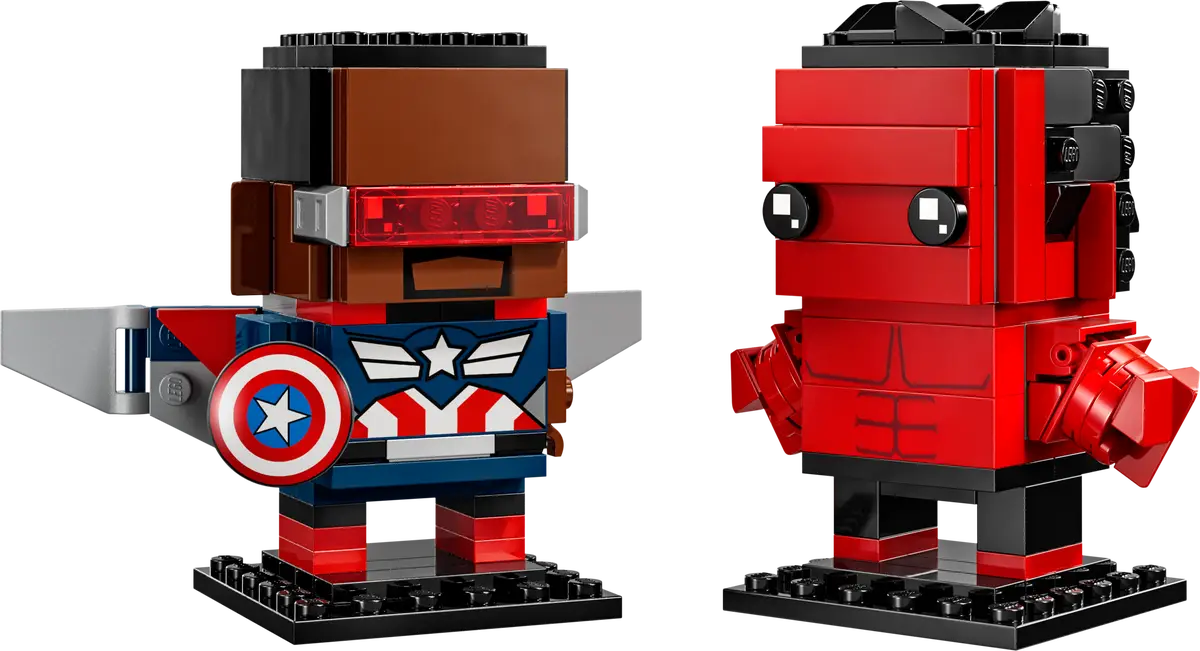

In [ ]:
image = Image.open('captain-america-red-hulk-figures-40668.webp')
image.show()
display(image)

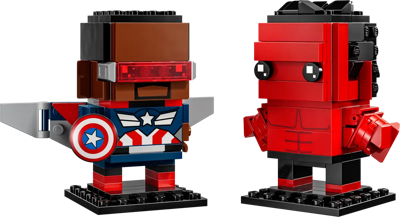

In [ ]:
resized_image_1 = image.resize((image.width // 3, image.height // 3))
display(resized_image_1)

In [ ]:
#Bulk resize
import os

input_folder = '/content/drive/MyDrive/DATA2399_Final/LEGO_pics'
output_folder = 'resized_images'

# Create the output folder if it doesn't already exist
os.makedirs(output_folder, exist_ok=True)

# Loop through each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.webp'):  # Check for .webp files
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # Resize the image to 300x300
        resized_image = image.resize((image.width // 3, image.height // 3))

        # Change the file extension to .jpg
        new_filename = os.path.splitext(filename)[0] + '.jpg'
        output_path = os.path.join(output_folder, new_filename)

        # Save the resized image as a .jpg
        resized_image.convert('RGB').save(output_path, format='JPEG')

print("Images have been resized and converted to .jpg format.")

Images have been resized and converted to .jpg format.


In [ ]:
#Bulk adding border
import os
from PIL import Image, ImageOps

input_folder = 'resized_images'  # Folder containing the resized .jpg images
output_folder = 'bordered_images'  # Folder to save images with new border

# Create the output folder if it doesn't already exist
os.makedirs(output_folder, exist_ok=True)

# Set border dimensions (width and height of the background)
border_size = 50
background_color = 'lightblue'

# Loop through each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # Create a new image with a blue background
        border_width = image.width + 2 * border_size
        border_height = image.height + 2 * border_size
        bordered_image = Image.new('RGB', (border_width, border_height), background_color)

        # Calculate the position to paste the resized image so it is centered
        paste_position = (border_size, border_size)

        # Paste the resized image onto the blue background
        bordered_image.paste(image, paste_position)

        # Save the image with the blue border
        output_path = os.path.join(output_folder, filename)
        bordered_image.save(output_path, format='JPEG')

print("Images have been overlaid with a blue border.")

Images have been overlaid with a blue border.


##ReportLab Flyer

In [ ]:
!pip install reportlab
from reportlab.pdfgen import canvas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.4 MB/s eta 0:00:00


In [ ]:
import os
# Install pdf2image using pip
os.system('pip install pdf2image reportlab')

# Install poppler-utils using apt-get
os.system('apt-get install poppler-utils')

0

In [ ]:
os.chdir('/content/drive/MyDrive/DATA2399_Final/LEGO_pics')

In [ ]:
from reportlab.lib.pagesizes import landscape, letter
from reportlab.pdfgen import canvas
from reportlab.lib.colors import darkblue
import os
from PIL import Image

# Input folder containing images with borders
input_folder = 'bordered_images'
output_pdf = 'Best_LEGO_Sets_Flyer.pdf'

page_width, page_height = landscape((letter[0] / 2, letter[1] / 2))
# Create the PDF canvas
c = canvas.Canvas(output_pdf, pagesize=(page_width, page_height))

# Draw the title
c.setFont("Courier-Bold", 18)
c.setFillColor(darkblue)
line1 = "Top 5 Best LEGO Sets to"
line2 = "Give This Holiday Season!"
c.drawCentredString(page_width / 2, page_height - 30, line1)
c.drawCentredString(page_width / 2, page_height - 50, line2)


# Margins and grid setup
margin = 20
spacing = 10
columns = 2  # Number of images per row
image_size = 100  # Width and height for images
x_start = margin
y_start = page_height - 60  # Leave space for the title

# Iterate over images and position them on the page
x = x_start
y = y_start
for idx, filename in enumerate(sorted(os.listdir(input_folder))):
    if filename.endswith('.jpg'):
        image_path = os.path.join(input_folder, filename)

        # Draw the image
        c.drawImage(image_path, x, y - image_size, width=image_size, height=image_size)

        # Move to the next position
        x += image_size + spacing

        # Move to the next row if needed
        if x + image_size + spacing > page_width - margin:
            x = x_start
            y -= image_size + spacing

            # Check if we need a new page
            if y - image_size < margin:
                c.showPage()
                c.setFont("Helvetica-Bold", 16)
                c.drawCentredString(page_width / 2, page_height - 30, title)
                y = y_start

# Save the PDF
c.save()

print(f"Flyer saved as {output_pdf}")

Flyer saved as Best_LEGO_Sets_Flyer.pdf


In [ ]:
from pdf2image import convert_from_path
import os

# PDF file path
pdf_path = "/content/drive/MyDrive/DATA2399_Final/LEGO_pics/Best_LEGO_Sets_Flyer.pdf"
output_folder = "/content/drive/MyDrive/DATA2399_Final/LEGO_pics"
output_file = "Best_LEGO_Sets_Flyer.jpg"

# Convert PDF to JPEG
try:
    # Convert PDF to a list of PIL Images (one image per page)
    images = convert_from_path(pdf_path, dpi=300)  # Higher dpi = better quality

    # Save the first page as a JPEG
    output_path = os.path.join(output_folder, output_file)
    images[0].save(output_path, "JPEG")
    print(f"PDF successfully converted to JPEG: {output_path}")

except Exception as e:
    print(f"An error occurred: {e}")

PDF successfully converted to JPEG: /content/drive/MyDrive/DATA2399_Final/LEGO_pics/Best_LEGO_Sets_Flyer.jpg


#Set Up Bulk Personalized Emails

In [ ]:
import pandas as pd

# Had to remake the dataframe manually to complete the rest without messing up our dataframe above
data = {
    "Product Name": ["The Botanical Garden", "Santa's Post Office", "X-Men: The X-Mansion", "Supply Llama", "Durrr Burger",
                     "Christmas Table Decoration", "Santa's Delivery Truck", "The Insect Collection", "Bumblebee",
                     "Captain America & Red Hulk Figures", "Jaws", "Dungeons & Dragons®", "The Force of Creativity",
                     "Concorde", "Stitch", "EVE & WALL•E"],
    "Price": ["$329.99", "$99.99", "$329.99", "$39.99", "$14.99", "$39.99\n$27.99\n30% OFF", "$19.99", "$79.99", "$89.99",
              "$19.99", "$149.99", "$4.99\n$3.99\n20% OFF", "$149.99", "$199.99", "$9.99", "$14.99"],
    "Number of Pieces": [3792, 1440, 3093, 691, 193, 433, 224, 1111, 950, 202, 1497, 9, 2083, 152, 155, None],
    "Recommended Age": ["18+", "18+", "18+", "12+", "9+", "12+", "8+", "18+", "18+", "10+", "18+", "5+", "18+", "18+", "10+", "10+"],
    "Rating out of 5": [4.8, 4.8, 4.1, 4.8, 4.5, 4.8, 5.0, 4.9, 4.4, 5.0, 4.6, 3.2, 3.5, 5.0, 5.0, 4.9],
    "Short Link": ["/en-us/product/the-botanical-garden-21353", "/en-us/product/santa-s-post-office-10339", "/en-us/product/x-men-the-x-mansion-76294",
                   "/en-us/product/fortnite-77071-77071", "/en-us/product/durrr-burger-77070", "/en-us/product/christmas-table-decoration-40743",
                   "/en-us/product/santas-delivery-truck-40746", "/en-us/product/the-insect-collection-21342", "/en-us/product/bumblebee-10338",
                   "/en-us/product/captain-america-red-hulk-figures-40668", "/en-us/product/jaws-21350", "/en-us/product/tbd-minifigures-ip-3-2024-71047",
                   "/en-us/product/the-force-of-creativity-5008878", "/en-us/product/concorde-10318", "/en-us/product/stitch-40674", "/en-us/product/eve--walle-40619"]
}
lego_df = pd.DataFrame(data)
lego_df
# Select specific rows
poster_rows = lego_df.loc[[0, 1, 9, 10, 14]]

# Display the specific rows
poster_rows

,Product Name,Price,Number of Pieces,Recommended Age,Rating out of 5,Short Link
0,The Botanical Garden,$329.99,3792.0,18+,4.8,/en-us/product/the-botanical-garden-21353
1,Santa's Post Office,$99.99,1440.0,18+,4.8,/en-us/product/santa-s-post-office-10339
9,Captain America & Red Hulk Figures,$19.99,202.0,10+,5.0,/en-us/product/captain-america-red-hulk-figure...
10,Jaws,$149.99,1497.0,18+,4.6,/en-us/product/jaws-21350
14,Stitch,$9.99,155.0,10+,5.0,/en-us/product/stitch-40674


In [ ]:
!pip install openpyxl

In [ ]:
poster_rows.to_excel('poster_rows.xlsx', index=False)

In [ ]:
# App Password: Workflow_Automation
test_p = 'usxmygyzkepirift'

In [ ]:
# Email List
email_list = [
    {"email": "practiceautomation59@gmail.com", "name": "Emilio"},
    {"email": "automation.practice.madison@gmail.com", "name": "Madison"},
    {"email": "automation.practice.natalie@gmail.com", "name": "Natalie"},
    {"email": "svseptember@gmail.com", "name": "Sneha"},
    {"email": "rafiul208@gmail.com", "name": "Dr.Islam"}
]

In [ ]:
email_list

[{'email': 'practiceautomation59@gmail.com', 'name': 'Emilio'},
 {'email': 'automation.practice.madison@gmail.com', 'name': 'Madison'},
 {'email': 'automation.practice.natalie@gmail.com', 'name': 'Natalie'},
 {'email': 'svseptember@gmail.com', 'name': 'Sneha'},
 {'email': 'rafiul208@gmail.com', 'name': 'Dr.Islam'}]

In [ ]:
email_list = {"email": "natalie.huang417@gmail.com", "name": "Natalie"}

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
from email.mime.base import MIMEBase
from email import encoders
import os

# Email credentials
sender_email = "automation.practice.natalie@gmail.com"
app_password = 'usxmygyzkepirift'

# Define the recipient email list
email_list = [
    {"email": "practiceautomation59@gmail.com", "name": "Emilio"},
    {"email": "automation.practice.madison@gmail.com", "name": "Madison"},
    {"email": "automation.practice.natalie@gmail.com", "name": "Natalie"},
    {"email": "svseptember@gmail.com", "name": "Sneha"},
    {"email": "rafiul208@gmail.com", "name": "Dr.Islam"}
]

# Paths to flyer image and Excel file
flyer_path = "/content/drive/MyDrive/DATA2399_Final/LEGO_pics/Best_LEGO_Sets_Flyer.jpg"
excel_path = "/content/drive/MyDrive/DATA2399_Final/LEGO_pics/poster_rows.xlsx"

# Email message template
html_template = """
<html>
<head>
<style>
  body {{
    font-family: Arial, sans-serif;
    line-height: 1.8;
    font-size: 18px;
  }}
  .intro {{
    color: red;
    font-size: 20px;
    font-weight: bold;
  }}
  .highlight {{
    color: red;
    font-weight: bold;
  }}
  ul {{
    border: 2px solid green;
    padding: 10px;
    list-style-type: none;
  }}
  ul li {{
    margin: 5px 0;
  }}
  .flyer {{
    text-align: center;
    margin-top: 20px;
  }}
</style>
</head>
<body>
  <p class="intro">Hi {name},</p>
  <p>Looking for the perfect holiday gift for your loved ones? Here are the <span class="highlight">top 5 LEGO sets</span> to give this holiday season:</p>
  <ul>
    <li>1. LEGO Captain America & Red Hulk Figures</li>
    <li>2. LEGO Jaws</li>
    <li>3. LEGO Santa's Post Office</li>
    <li>4. LEGO Stitch</li>
    <li>5. LEGO Botanical Garden</li>
  </ul>
  <div class="flyer">
    <img src="cid:flyer_image" alt="Flyer" width="400">
  </div>
  <p>Check out the attached Excel file for more information. Inside you'll find set prices, number of pieces, recommended age range, and ratings from other customers!</p>
  <p>Happy Holidays!</p>
</body>
</html>
"""

# Configure and send the emails
try:
    with smtplib.SMTP("smtp.gmail.com", 587) as server:
        server.starttls()
        server.login(sender_email, app_password)

        for recipient in email_list:
            # Create the email
            msg = MIMEMultipart("related")
            msg["From"] = sender_email
            msg["To"] = recipient["email"]
            msg["Subject"] = "Snap up the best gifts this holiday season— one brick at a time!"

            # Add HTML body
            personalized_html = html_template.format(name=recipient["name"])
            html_part = MIMEText(personalized_html, "html")
            msg.attach(html_part)

            # Attach the flyer image (for inline display)
            with open(flyer_path, "rb") as flyer:
                img_part = MIMEImage(flyer.read())
                img_part.add_header("Content-ID", "<flyer_image>")
                img_part.add_header("Content-Disposition", "inline; filename=flyer.jpg")
                msg.attach(img_part)

            # Attach the Excel file
            with open(excel_path, "rb") as excel_file:
                excel_part = MIMEBase("application", "octet-stream")
                excel_part.set_payload(excel_file.read())
                encoders.encode_base64(excel_part)
                excel_part.add_header("Content-Disposition", f"attachment; filename={os.path.basename(excel_path)}")
                msg.attach(excel_part)

            # Send the email
            server.sendmail(sender_email, recipient["email"], msg.as_string())
            print(f"Email sent to {recipient['name']} ({recipient['email']})")

except Exception as e:
    print(f"An error occurred: {e}")

Email sent to Emilio (practiceautomation59@gmail.com)
Email sent to Madison (automation.practice.madison@gmail.com)
Email sent to Natalie (automation.practice.natalie@gmail.com)
Email sent to Sneha (svseptember@gmail.com)
Email sent to Dr.Islam (rafiul208@gmail.com)


# Schedule and Send Emails

In [12]:
os.environ['TZ'] = 'America/Chicago'

In [13]:
def send_email():
   with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
        server.login(sender_email, app_password)
        server.sendmail(sender_email, recipient["email"], individual_message.as_string())
        print(f"Email sent successfully to {recipient['email']}") # Added for better tracking

In [ ]:
schedule.clear()
schedule.every().day.at("09:00").do(send_email)
# pending job
try:
    while True:
        schedule.run_pending()
        time.sleep(1)  # Wait for 1 second before checking for pending jobs again
except KeyboardInterrupt:
    print('Scheduler stopped.')

Email sent successfully to automation.practice.natalie@gmail.com
Scheduler stopped.
